# Reconstruir un árbol a partir de un preorder y un in-order

Caso de prueba:

```
dbeafcg
abdecfg
```

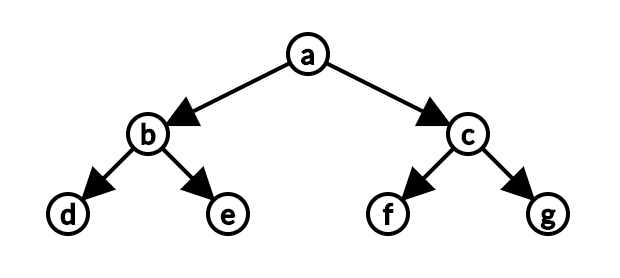

Tomo como raíz a `a`, el primer elemnto de la secuencia en orden prefijo. Con ella separo el input:

```
dbeafcg
abdecfg
```

Luego, me quedan
```
dbe
bde
```

y 

```
fcg
cfg
```

Siguiendo así, desarmamos el arbol

In [145]:
class Tree:
    def __init__(self, root, left=None, right=None):
        self.left = left
        self.root = root
        self.right = right

    def __repr__(self):
        return f"Tree({repr(self.root)}, {repr(self.left)}, {repr(self.right)})"
    
    def __eq__(self, other):
        return type(other) == type(self) and self.left == other.left and self.root == other.root and self.right == other.right
    
    def __str__(self):
        

Tree('a', None, Tree('b', None, None))


In [151]:
class Tree:

    def __init__(self, root, left=None, right=None):
        self.left = left
        self.root = root
        self.right = right
    
    def __repr__(self):
        return f"Tree({repr(self.root)}, {repr(self.left)}, {repr(self.right)})"
    
    def __eq__(self, other):
        return type(other) == type(self) and self.left == other.left and self.root == other.root and self.right == other.right
    
    def __str__(self):
        lines_left = str(self.left).split('\n') if self.left else []
        lines_right = str(self.right).split('\n') if self.right else []

        # Profundidad máxima de los sub arboles
        depth = max(len(lines_left), len(lines_right))

        
        width_left = max(map(len, lines_left)) if lines_left else 0
        left_pad = ' ' * width_left

        out = left_pad + self.root
        for d in range(depth):
            line = ''

            if d < len(lines_left):
                line += lines_left[d]
            
            if d < len(lines_right):
                line = line.ljust(width_left, ' ')
                line += ' ' + lines_right[d]
            
            out += '\n' + line

        return out


assert str(Tree('a')) == 'a'
assert str(Tree('a', Tree('b'))) == ' a\nb'
assert str(Tree('a', Tree('b'), Tree('c'))) == ' a\nb c'
assert str(Tree('a', None, Tree('b'))) == 'a\n b'

In [160]:
print(Tree('a', Tree('b'), Tree('c', Tree('d'), Tree('e'))))

 a
b  c
  d e


In [149]:
def reconstruct_tree(infix, prefix):
    root = prefix[0]

    n = len(infix)
    n_left = infix.index(root)

    left = None
    if 0 < n_left:
        infix_left = infix[:n_left]
        prefix_left = prefix[1:n_left + 1]
        left = reconstruct_tree(infix_left, prefix_left)

    right = None
    if 1 + n_left < n:
        infix_right = infix[1 + n_left:]
        prefix_right = prefix[n_left + 1:]
        right = reconstruct_tree(infix_right, prefix_right)
    
    return Tree(root, left, right)

assert reconstruct_tree('a', 'a') == Tree('a')
assert reconstruct_tree('ab', 'ab') == Tree('a', None, Tree('b'))
assert reconstruct_tree('bac', 'abc') == Tree('a', Tree('b'), Tree('c'))
assert reconstruct_tree('ba', 'ab') == Tree('a', Tree('b'))
assert reconstruct_tree('acb', 'abc') == Tree('a', None, Tree('b', Tree('c')))
reconstruct_tree('ab', 'ab')

Tree('a', None, Tree('b', None, None))